In [241]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x11_colors = [
    'aqua', 'aquamarine', 'black', 'blue',
    'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue',
    'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki',
    'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue',
    'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey',
    'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod',
    'gray', 'green', 'greenyellow', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush',
    'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen',
    'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue',
    'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid',
    'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred',
    'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange',
    'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru',
    'pink', 'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen',
    'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan',
    'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen'
]

In [242]:
# 원본 데이터 불러오기
file_path = 'C:\\Users\\user\\OneDrive - (주)이머전트머티리얼즈\\4_Portfolio\\HANARO_FCD_Plotter\\Data\\20240617_Ti3Sb\\Ti3Sb_1st_sample.scan'
with open(file_path, 'r') as f:
    data_law = f.readlines()

In [243]:
# 1. scan 파일의 헤더 부분과 스캔 데이터부분으로 분할
# - Scan 명령의 시작은 #S로 시작
# - #S 1을 기준으로 위아래가 헤더와 스캔 데이터 부분

# #S 1을 찾아서 몇번째 index인지 저장
for idx, line in enumerate(data_law):
    if '#S 1' in line:
        sep_line_idx = idx
        break

# sep_line_idx가 저장되었는지 확인
if 'sep_line_idx' in locals().keys():
    pass
else:
    print('데이터 분할이 정상적으로 되지 않음.')

header = data_law[:sep_line_idx]
data = data_law[sep_line_idx:]

In [244]:
# 2. #S (n)라인에 모터제어 명령어가 포함 되어 있음
# - #S 라인 인덱스를 모두 저장하기
# - #L은 컬럼 정보를 포함한 라인이고 #S 보다 인덱스가 상대적으로 10 큼
# - 데이터는 #S 에서 인덱스가 11큰 지점부터 데이터 포인트 수만큼 
col_line_num_ralative = 10
data_list = []
for idx, line1 in enumerate(data):
    if '#S'in line1:
        # 양끝 빈칸 제거
        line_striped = line1.strip()
        
        # 제어 명령 데이터 저장
        num_scan = line_striped.split('  ')[0]
        scan_motor_angle = line_striped.split('  ')[2].split(' ')
        scan_numdata_time = line_striped.split('  ')[3].split(' ')

        # 데이터 컬럼 리스트 정의
        col_line = data[idx + 10]
        motor_type = col_line.strip().split('H')[0].split('#L')[1].strip()
        col_names = [motor_type, 'H', 'K', 'L', 'Epoch', 'Seconds', 'Monitor', 'Detector']

        # 데이터 분할
        numdata = int(scan_numdata_time[0])
        tmp_data1 = data[idx + 11: idx+numdata+1]
        
        # 분할된 데이터 편집
        tmp_data2 = []
        for line2 in tmp_data1:
            line_striped2 = line2.strip().split(' ')
            tmp_data2.append(line_striped2)

        # 분할된 데이터 저장
        df = pd.DataFrame(tmp_data2, columns= col_names).astype(float)
        data_list.append(df)

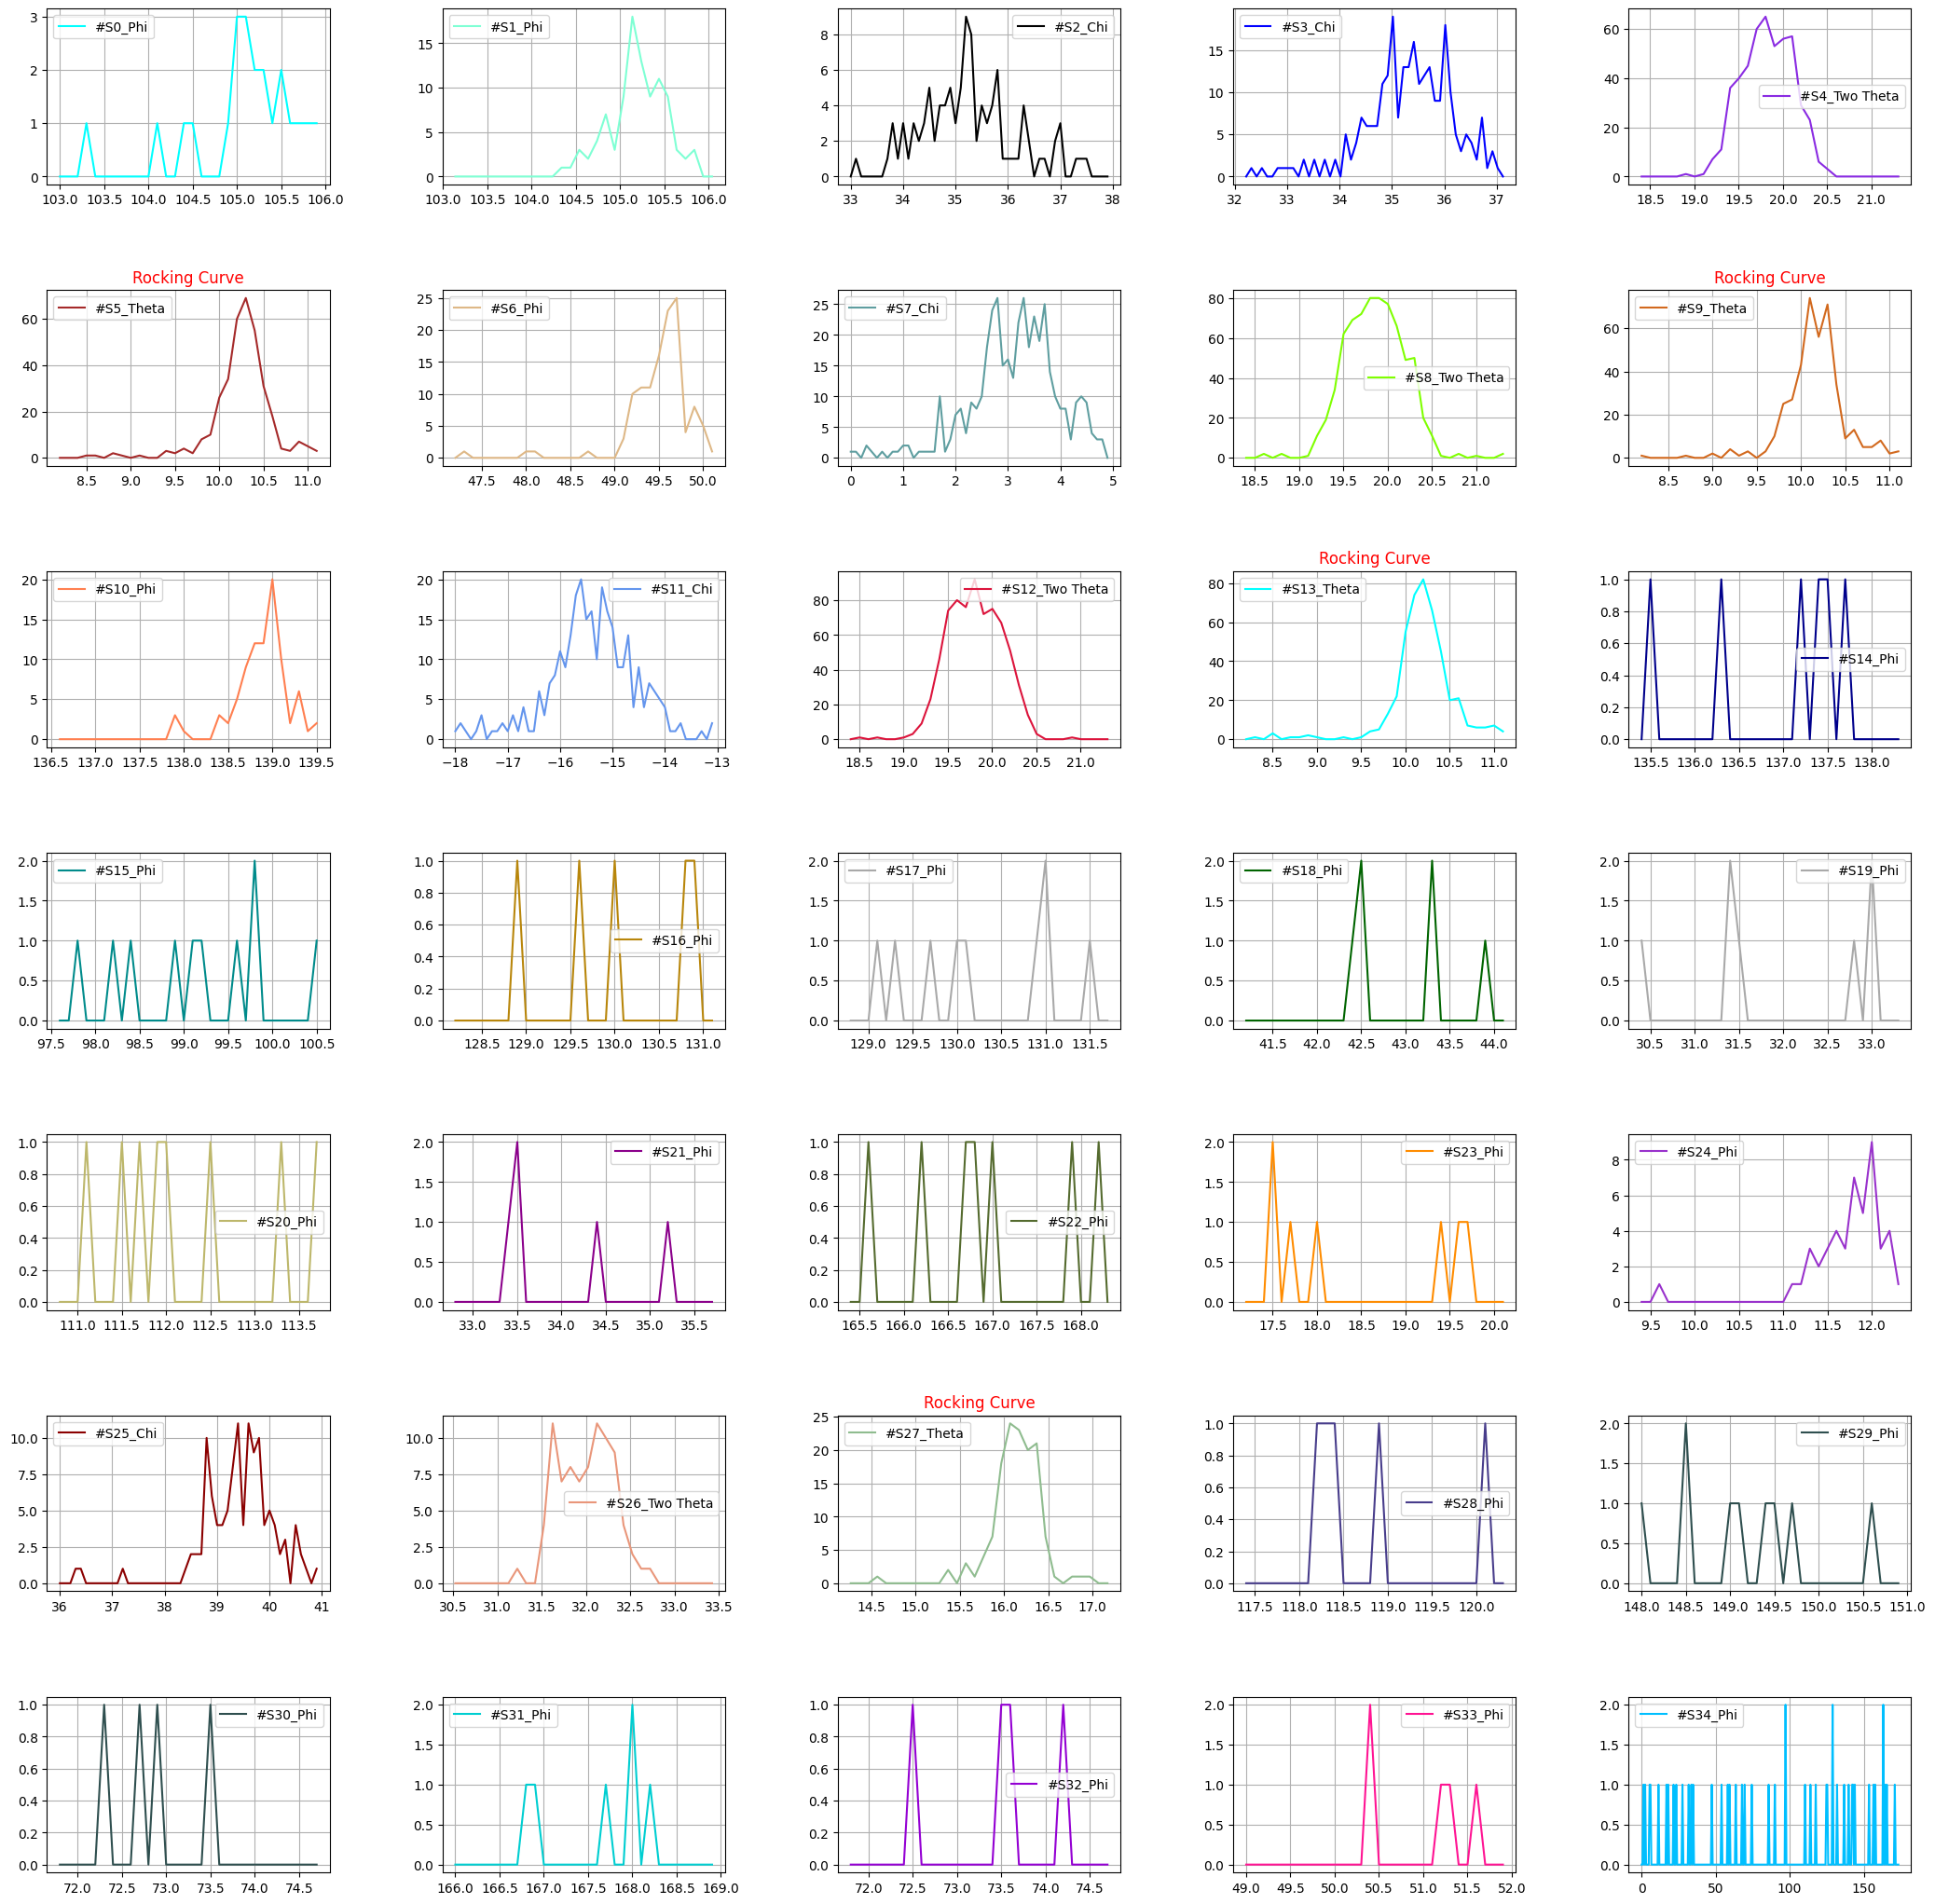

In [249]:
# 3. 데이터 플랏
ncols = 5

fig, axs = plt.subplots(ncols=ncols, nrows=int(len(data_list)/5), figsize = (5* ncols, 5 * ncols))
for idx, data in enumerate(data_list):
    i = idx // ncols
    j = idx % ncols

    motor = data.columns[0]
    x = data[motor]
    y = data['Detector']
    
    axs[i][j].plot(x,y, x11_colors[idx], label = f'#S{idx}_{motor}')
    axs[i][j].legend()
    axs[i][j].grid(True)
    
    if motor == 'Theta':
        axs[i][j].set_title('Rocking Curve', color = 'r')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)